### Test and validate lcdb chipseq-wf with S2 cell modENCODE data

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline

In [2]:
sra = pd.read_csv('../../output/chip/20171103_s2cell_chip-seq.csv')
sra.head()

In [3]:
modENCODE = pd.read_table('../../data/modENCODE_sampletable.tsv')
modENCODE.head()

In [5]:
len(modENCODE.srx.unique())

1707

In [8]:
merged = sra.merge(modENCODE, on='srx', how='inner')

In [9]:
merged.shape

(51, 13)

In [10]:
merged.modENCODE_id.unique()

array(['modENCODE_2638', 'modENCODE_2639', 'modENCODE_4715',
       'modENCODE_4716', 'modENCODE_2979', 'modENCODE_3953',
       'modENCODE_5595', 'modENCODE_5596'], dtype=object)

In [11]:
mymod = pd.read_table('../../output/chip/modENCODE_big.bed', header=None, names=['chrom', 'start','stop','score','strand','modENCODE_id','type','stage','otherid'])

In [13]:
check = mymod.merge(merged, on='modENCODE_id', how='inner')

In [14]:
check.srr_x.unique()

array(['SRR034720 | SRR034721', 'SRR034722', 'SRR034724 | SRR034723',
       'SRR034725'], dtype=object)

In [15]:
check.geo.unique()

array(['GSM499649', 'GSM499650', 'GSM499651', 'GSM499652'], dtype=object)

did a fastq dump for the above SRRs and ran them through the chipseq-wf. now validation: 

In [16]:
other_data = check[['chrom','start','stop','srx']]
other_data.to_csv('../../output/chip/modE_s2.bed', header=None, index=False, sep='\t')

In [17]:
SRX016158_narrow = pd.read_table('../../chipseq-wf/data/chipseq_peaks/macs2/CTCF-1-narrow/peaks.bed', header=None)

import result of bedtools coverage test: 

In [20]:
coverage = pd.read_table('../../output/chip/peakintersecttest', header=None)[[0,1,2,3,12]]
coverage.columns = ['chrom','start','end','name','overlap']

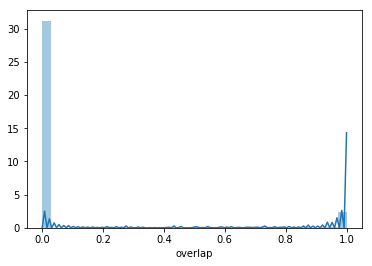

In [23]:
sb.distplot(coverage['overlap'])

In [52]:
filtered = coverage[coverage.overlap > 0.01]

In [53]:
filtered['chrom'] = ['chr'+str(x) for x in filtered.chrom]

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
filtered[['chrom','start','end','name']].to_csv('../../output/chip/filteredpeaks', header=None, index=False, sep='\t')

## Another round of testing: 

Justin thought that one of the reasons our coverage looks so bad above could be that CTCF is "weird", so trying again with h3k9me3.  

In [33]:
h3k9 = pd.read_csv('../../output/chip/results-table.csv')

In [39]:
h3k9bed = h3k9[['Binding Site > Chromosome > DB identifier',
       'Binding Site > Chromosome Location > Start',
       'Binding Site > Chromosome Location > End',]]

In [41]:
h3k9bed.to_csv('../../output/chip/h3k9.bed', header=None, index=False, sep='\t')

In [42]:
fixbed = pd.read_table('../../output/chip/h3k9.bed', header=None)

In [44]:
fixbed[0] = ['chr'+str(x) for x in fixbed[0]]

In [47]:
fixbed.to_csv('../../output/chip/liftmeover.bed', header=None, index=False, sep='\t')

Import bedtools coverage test results again: 

In [48]:
coverage2 = pd.read_table('../../output/chip/peakcoverage_test2', header=None)

In [51]:
coverage2.shape

(511, 13)

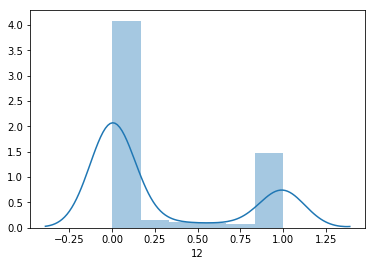

In [50]:
sb.distplot(coverage2[12])